<a href="https://colab.research.google.com/github/18ALI07/Flight-delay-detection/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.7 MB/s eta 0:00:00


In [ ]:
import re
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import category_encoders as ce
import matplotlib.pyplot as plt
from collections import OrderedDict
import matplotlib.patches as patches
from matplotlib.gridspec import GridSpec
from matplotlib.patches import ConnectionPatch
%matplotlib inline

# Data Reading

In [ ]:
url = "https://raw.githubusercontent.com/maneshwarS/Flight-Delay-Prediction/master/Dataset.csv"
data = pd.read_csv(url)
data.drop('Category', axis=1, inplace=True)

In [ ]:
data.head()

,Used Date,From,To,Airline,Scheduled Departure,SDEP,Departure,DEP,Scheduled Arrival,SARR,...,Airport Rating,Market Share,OTP Index,weather__hourly__windspeedKmph,weather__hourly__weatherDesc__value,weather__hourly__precipMM,weather__hourly__humidity,weather__hourly__visibility,weather__hourly__pressure,weather__hourly__cloudcover
0,31-01-2020,DEL,HYD,Air Asia,06:05,605,06:04,604,08:15,815,...,0.88,5.3,85.6,11,Partly cloudy,0,90,9,1012,57
1,31-01-2020,DEL,HYD,Indigo,04:50,450,04:36,436,07:00,700,...,0.88,47.5,81.1,11,Partly cloudy,0,90,9,1012,57
2,30-01-2020,DEL,HYD,Air Asia,06:05,605,05:54,554,08:15,815,...,0.88,5.3,85.6,11,Partly cloudy,0,90,9,1012,57
3,30-01-2020,DEL,HYD,Air Asia,17:40,1740,17:40,1740,19:55,1955,...,0.88,5.3,85.6,11,Partly cloudy,0,90,9,1012,57
4,30-01-2020,DEL,HYD,Air Asia,19:50,1950,19:54,1954,22:10,2210,...,0.88,5.3,85.6,11,Partly cloudy,0,90,9,1012,57


In [ ]:
data['Used Date'] = pd.to_datetime(data['Used Date'], format='%d-%m-%Y')
data['Date'] = data['Used Date'].dt.day
data['Month'] = data['Used Date'].dt.month
data['Year'] = data['Used Date'].dt.year
data.drop('Used Date', axis=1, inplace=True)

In [ ]:
data.head()

,From,To,Airline,Scheduled Departure,SDEP,Departure,DEP,Scheduled Arrival,SARR,Arrival,...,weather__hourly__windspeedKmph,weather__hourly__weatherDesc__value,weather__hourly__precipMM,weather__hourly__humidity,weather__hourly__visibility,weather__hourly__pressure,weather__hourly__cloudcover,Date,Month,Year
0,DEL,HYD,Air Asia,06:05,605,06:04,604,08:15,815,08:16,...,11,Partly cloudy,0,90,9,1012,57,31,1,2020
1,DEL,HYD,Indigo,04:50,450,04:36,436,07:00,700,06:55,...,11,Partly cloudy,0,90,9,1012,57,31,1,2020
2,DEL,HYD,Air Asia,06:05,605,05:54,554,08:15,815,08:02,...,11,Partly cloudy,0,90,9,1012,57,30,1,2020
3,DEL,HYD,Air Asia,17:40,1740,17:40,1740,19:55,1955,19:42,...,11,Partly cloudy,0,90,9,1012,57,30,1,2020
4,DEL,HYD,Air Asia,19:50,1950,19:54,1954,22:10,2210,22:14,...,11,Partly cloudy,0,90,9,1012,57,30,1,2020


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10718 entries, 0 to 10717
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   From                                 10718 non-null  object 
 1   To                                   10718 non-null  object 
 2   Airline                              10718 non-null  object 
 3   Scheduled Departure                  10718 non-null  object 
 4   SDEP                                 10718 non-null  int64  
 5   Departure                            10718 non-null  object 
 6   DEP                                  10718 non-null  int64  
 7   Scheduled Arrival                    10718 non-null  object 
 8   SARR                                 10718 non-null  int64  
 9   Arrival                              10718 non-null  object 
 10  ARR                                  10718 non-null  int64  
 11  Departure Delay             

In [ ]:
data.describe()

,SDEP,DEP,SARR,ARR,Departure Delay,Arrival Delay,Status,Distance,Passenger Load Factor,Airline Rating,...,OTP Index,weather__hourly__windspeedKmph,weather__hourly__precipMM,weather__hourly__humidity,weather__hourly__visibility,weather__hourly__pressure,weather__hourly__cloudcover,Date,Month,Year
count,10718.000000,10718.000000,10718.000000,10718.000000,10718.000000,10718.000000,10718.000000,10718.000000,10718.000000,10718.000000,...,10718.000000,10718.000000,10718.000000,10718.000000,10718.000000,10718.000000,10718.000000,10718.000000,10718.000000,10718.000000
mean,1347.070349,1331.483486,1320.709461,1260.562605,26.080892,27.628009,0.992909,1287.418175,86.294365,0.588813,...,79.493180,12.323195,0.241090,62.952323,9.953443,1012.578000,32.011569,17.283635,9.088169,2019.204702
std,642.298422,666.186884,704.680126,723.536840,126.088783,133.545628,0.083912,319.679362,3.779119,0.157973,...,7.158847,5.428185,1.078129,21.806752,1.715943,4.404972,28.207542,8.782664,4.310386,0.403503
min,5.000000,-1.000000,5.000000,-1.000000,-60.000000,-61.000000,0.000000,848.000000,76.000000,0.300000,...,53.100000,1.000000,0.000000,5.000000,2.000000,991.000000,0.000000,1.000000,1.000000,2019.000000
25%,730.000000,726.000000,835.000000,754.250000,0.000000,-4.000000,1.000000,1138.000000,84.300000,0.500000,...,76.800000,9.000000,0.000000,46.000000,10.000000,1012.000000,4.000000,10.000000,10.000000,2019.000000
50%,1320.000000,1259.000000,1245.000000,1220.000000,0.000000,3.000000,1.000000,1244.000000,85.000000,0.700000,...,81.100000,12.000000,0.000000,65.000000,10.000000,1013.000000,25.000000,19.000000,11.000000,2019.000000
75%,2000.000000,2000.000000,2010.000000,1955.000000,19.000000,25.000000,1.000000,1736.000000,90.100000,0.700000,...,82.900000,15.000000,0.000000,83.000000,10.000000,1015.000000,57.000000,25.000000,12.000000,2019.000000
max,2350.000000,2359.000000,2355.000000,2359.000000,1440.000000,1440.000000,1.000000,1736.000000,94.000000,0.800000,...,95.200000,36.000000,21.000000,96.000000,20.000000,1022.000000,100.000000,31.000000,12.000000,2020.000000


In [ ]:
# 'Status', 'OTP Index', 'Airline Rating', 'Airport Rating'

## Graphs

<Figure size 1000x500 with 0 Axes>

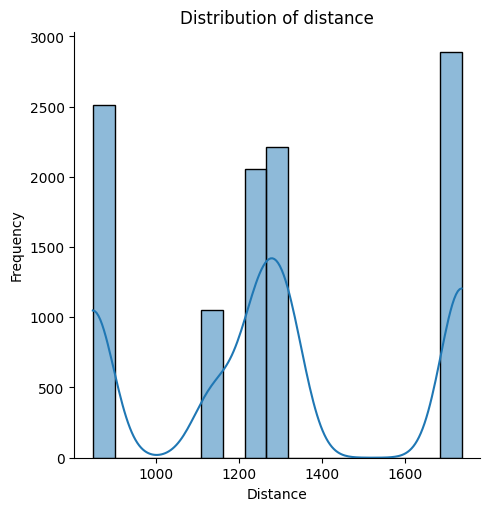

In [ ]:
plt.figure(figsize=(10,5))
#sns.distplot(data['Distance'], hist=False, color="b", kde_kws={"fill": True})
sns.displot(data["Distance"], kde=True)
plt.xlabel("Distance")
plt.ylabel("Frequency")
plt.title("Distribution of distance")
plt.show()

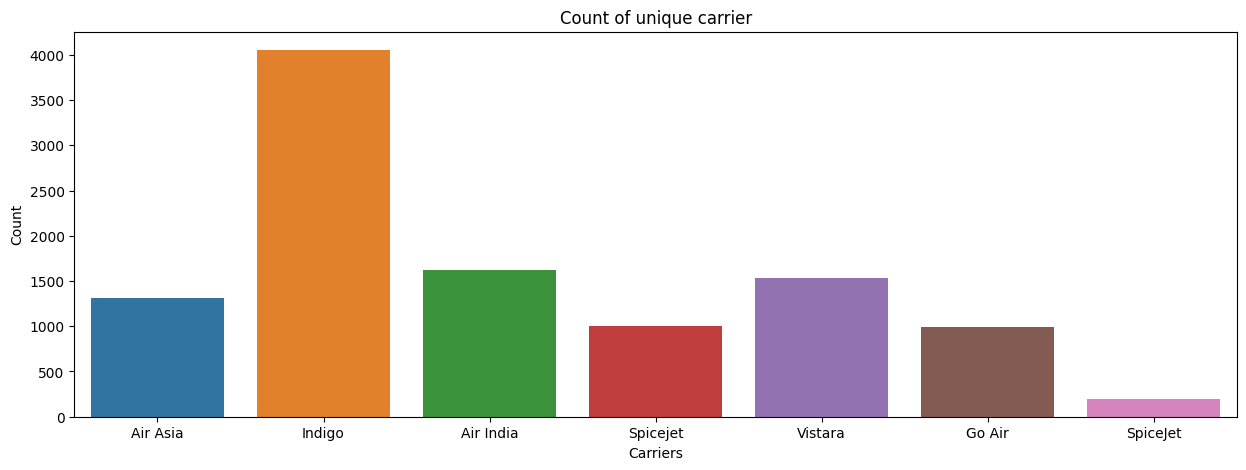

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x=data['Airline'], data=data)
plt.xlabel("Carriers")
plt.ylabel("Count")
plt.title("Count of unique carrier")
plt.show()

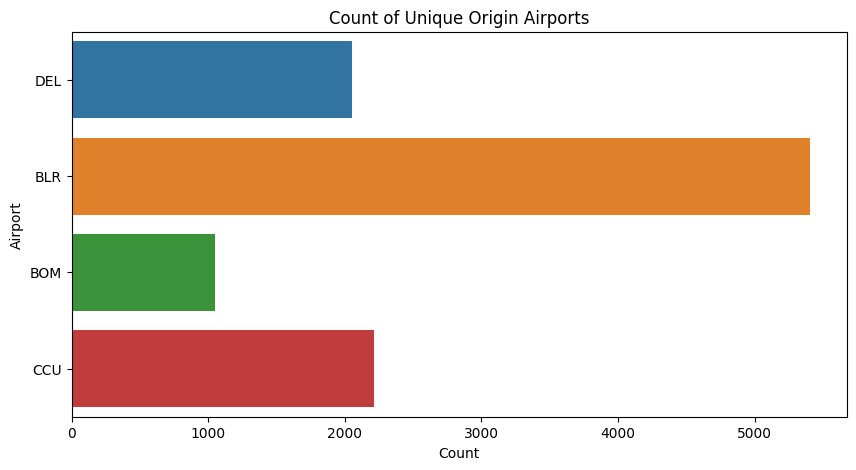

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(y=data['From'], data=data, orient="h")
plt.xlabel("Count")
plt.ylabel("Airport")
plt.title("Count of Unique Origin Airports")
plt.show()

Text(0, 0.5, 'Weather Conditions')

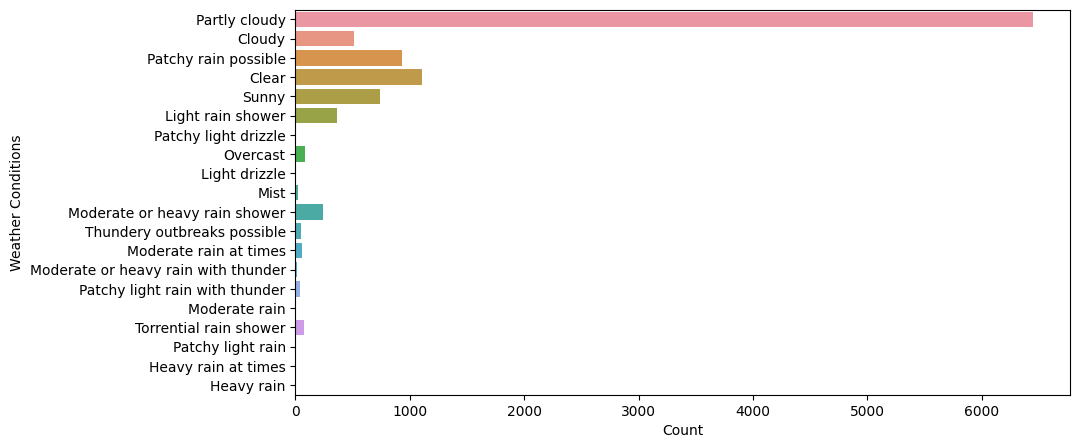

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(y = 'weather__hourly__weatherDesc__value', data = data)
plt.xlabel("Count")
plt.ylabel("Weather Conditions")

In [ ]:
data[data['Arrival Delay'] >= 400]['Arrival Delay']

5        1440
41       1440
47       1440
55       1440
65       1440
         ... 
10627    1422
10652    1422
10662    1412
10674    1422
10677    1440
Name: Arrival Delay, Length: 94, dtype: int64

## Data Pre Processing

In [ ]:
data.drop(['Scheduled Departure', 'Departure', 'Scheduled Arrival', 'Arrival', 'Status'], axis = 1, inplace = True)

In [ ]:
data.head()

,From,To,Airline,SDEP,DEP,SARR,ARR,Departure Delay,Arrival Delay,Distance,...,weather__hourly__windspeedKmph,weather__hourly__weatherDesc__value,weather__hourly__precipMM,weather__hourly__humidity,weather__hourly__visibility,weather__hourly__pressure,weather__hourly__cloudcover,Date,Month,Year
0,DEL,HYD,Air Asia,605,604,815,816,-1,1,1244,...,11,Partly cloudy,0,90,9,1012,57,31,1,2020
1,DEL,HYD,Indigo,450,436,700,655,-14,-5,1244,...,11,Partly cloudy,0,90,9,1012,57,31,1,2020
2,DEL,HYD,Air Asia,605,554,815,802,-11,-13,1244,...,11,Partly cloudy,0,90,9,1012,57,30,1,2020
3,DEL,HYD,Air Asia,1740,1740,1955,1942,0,-13,1244,...,11,Partly cloudy,0,90,9,1012,57,30,1,2020
4,DEL,HYD,Air Asia,1950,1954,2210,2214,4,4,1244,...,11,Partly cloudy,0,90,9,1012,57,30,1,2020


In [ ]:
# Create a new column called dep_delay_category
data['dep_delay_category'] = data['Departure Delay'].apply(lambda x: 1 if x > 0 else 0)
# Create a new column called arr_delay_category
data['arr_delay_category'] = data['Arrival Delay'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
x = data[data['dep_delay_category'] == 1]

In [ ]:
x.shape

(5247, 27)

In [ ]:
x[x['arr_delay_category'] == 1].shape

(4264, 27)

In [ ]:
y = data[data['dep_delay_category'] == 0]

In [ ]:
y.shape

(5471, 27)

In [ ]:
y[y['arr_delay_category'] == 1].shape

(1525, 27)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10718 entries, 0 to 10717
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   From                                 10718 non-null  object 
 1   To                                   10718 non-null  object 
 2   Airline                              10718 non-null  object 
 3   SDEP                                 10718 non-null  int64  
 4   DEP                                  10718 non-null  int64  
 5   SARR                                 10718 non-null  int64  
 6   ARR                                  10718 non-null  int64  
 7   Departure Delay                      10718 non-null  int64  
 8   Arrival Delay                        10718 non-null  int64  
 9   Distance                             10718 non-null  int64  
 10  Passenger Load Factor                10718 non-null  float64
 11  Airline Rating              

In [ ]:
data.head()

,From,To,Airline,SDEP,DEP,SARR,ARR,Departure Delay,Arrival Delay,Distance,...,weather__hourly__precipMM,weather__hourly__humidity,weather__hourly__visibility,weather__hourly__pressure,weather__hourly__cloudcover,Date,Month,Year,dep_delay_category,arr_delay_category
0,DEL,HYD,Air Asia,605,604,815,816,-1,1,1244,...,0,90,9,1012,57,31,1,2020,0,1
1,DEL,HYD,Indigo,450,436,700,655,-14,-5,1244,...,0,90,9,1012,57,31,1,2020,0,0
2,DEL,HYD,Air Asia,605,554,815,802,-11,-13,1244,...,0,90,9,1012,57,30,1,2020,0,0
3,DEL,HYD,Air Asia,1740,1740,1955,1942,0,-13,1244,...,0,90,9,1012,57,30,1,2020,0,0
4,DEL,HYD,Air Asia,1950,1954,2210,2214,4,4,1244,...,0,90,9,1012,57,30,1,2020,1,1


In [ ]:
from sklearn.preprocessing import LabelEncoder

# encode categorical data into numeric values
labelEncoder = LabelEncoder()
data["From"] = labelEncoder.fit_transform(data["From"])
data["To"] = labelEncoder.fit_transform(data["To"])

In [ ]:
data['Airline'] = data['Airline'].replace('Spicejet', 'SpiceJet')

In [ ]:
data['Airline'].unique()

array(['Air Asia', 'Indigo', 'Air India', 'SpiceJet', 'Vistara', 'Go Air'],
      dtype=object)

In [ ]:
# Encoding Airline
data["Airline"] = labelEncoder.fit_transform(data["Airline"])

# Encoding weather__hourly__weatherDesc__value
data["weather__hourly__weatherDesc__value"] = labelEncoder.fit_transform(data["weather__hourly__weatherDesc__value"])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10718 entries, 0 to 10717
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   From                                 10718 non-null  int64  
 1   To                                   10718 non-null  int64  
 2   Airline                              10718 non-null  int64  
 3   SDEP                                 10718 non-null  int64  
 4   DEP                                  10718 non-null  int64  
 5   SARR                                 10718 non-null  int64  
 6   ARR                                  10718 non-null  int64  
 7   Departure Delay                      10718 non-null  int64  
 8   Arrival Delay                        10718 non-null  int64  
 9   Distance                             10718 non-null  int64  
 10  Passenger Load Factor                10718 non-null  float64
 11  Airline Rating              

In [ ]:
data['Passenger Load Factor'].unique()

array([85. , 89. , 80. , 92. , 82. , 90. , 84.3, 89.7, 90.1, 92.7, 81.1,
       86.5, 83. , 87.6, 84.9, 91.1, 83.1, 85.1, 76. , 77.9, 86.7, 84.7,
       79. , 93. , 92.4, 82.4, 89.5, 82.5, 88.5, 93.7, 90.9, 94. , 93.3,
       87.8, 84.6, 91.4, 86.8, 87.5, 91.8, 88.4, 84.2])

## Environment Setup

In [ ]:
# Store the classifier models to save time
import joblib

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Classifiers from scikit-learn
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier


# Performance metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
features = data.drop(columns=["arr_delay_category", "Arrival Delay", "SARR", "ARR", "Year"
                            ])
# data.loc[:, data.columns != ["arr_delay_category", "dep_delay_category"]]
labels = np.asarray(data["arr_delay_category"])
print(features.columns)
data[["From", "To"]]

Index(['From', 'To', 'Airline', 'SDEP', 'DEP', 'Departure Delay', 'Distance',
       'Passenger Load Factor', 'Airline Rating', 'Airport Rating',
       'Market Share', 'OTP Index', 'weather__hourly__windspeedKmph',
       'weather__hourly__weatherDesc__value', 'weather__hourly__precipMM',
       'weather__hourly__humidity', 'weather__hourly__visibility',
       'weather__hourly__pressure', 'weather__hourly__cloudcover', 'Date',
       'Month', 'dep_delay_category'],
      dtype='object')


,From,To
0,3,2
1,3,2
2,3,2
3,3,2
4,3,2
...,...,...
10713,2,1
10714,2,1
10715,2,1
10716,3,2


In [ ]:
print(f"\nDataset shape: {data.shape}")
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.20, random_state=42)
print(f"features_train shape: {X_train.shape} | features_test shape: {X_test.shape}")
print(f"labels_train shape: {y_train.shape} | labels_test shape: {y_test.shape}")


Dataset shape: (10718, 27)
features_train shape: (8574, 22) | features_test shape: (2144, 22)
labels_train shape: (8574,) | labels_test shape: (2144,)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression

In [ ]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
logisticRegr.score(X_test_scaled, y_test)

0.7826492537313433

In [ ]:
y_pred_log = logisticRegr.predict(X_test_scaled)
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.76      0.79      0.78      1014
           1       0.81      0.77      0.79      1130

    accuracy                           0.78      2144
   macro avg       0.78      0.78      0.78      2144
weighted avg       0.78      0.78      0.78      2144



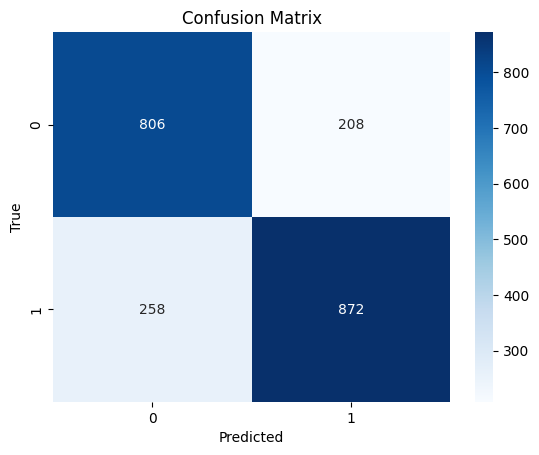

In [ ]:
cm = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## SVM

In [ ]:
clf = svm.SVC()
clf.fit(X_train_scaled, y_train)

SVC()

In [ ]:
clf.score(X_test_scaled, y_test)

0.8022388059701493

In [ ]:
y_pred_svm = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1014
           1       0.81      0.81      0.81      1130

    accuracy                           0.80      2144
   macro avg       0.80      0.80      0.80      2144
weighted avg       0.80      0.80      0.80      2144



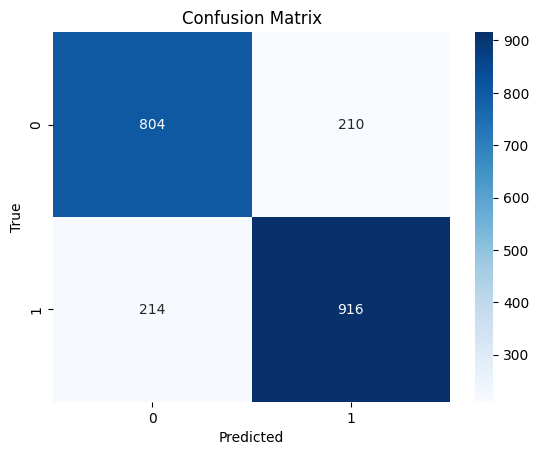

In [ ]:
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Decision Tree

In [ ]:
decTree = DecisionTreeClassifier()
decTree.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [ ]:
decTree.score(X_test_scaled, y_test)

0.7728544776119403

In [ ]:
y_pred_tree = decTree.predict(X_test_scaled)
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.77      0.74      0.76      1014
           1       0.78      0.80      0.79      1130

    accuracy                           0.77      2144
   macro avg       0.77      0.77      0.77      2144
weighted avg       0.77      0.77      0.77      2144



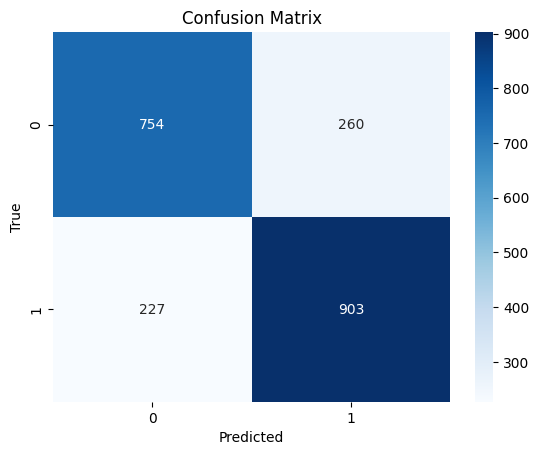

In [ ]:
cm = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators = 100, oob_score=True)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(oob_score=True)

In [ ]:
rf.oob_score_

0.8362491252624212

In [ ]:
rf.score(X_test_scaled, y_test)

0.8339552238805971

In [ ]:
rf.feature_importances_

array([0.0113474 , 0.01166113, 0.01491758, 0.07204482, 0.08936252,
       0.22332491, 0.01952636, 0.03562895, 0.01187473, 0.00958489,
       0.0364246 , 0.01601987, 0.04606469, 0.0202701 , 0.00563776,
       0.05339063, 0.00902083, 0.03973571, 0.04894339, 0.06293942,
       0.02167153, 0.1406082 ])

In [ ]:
y_pred_forest = rf.predict(X_test_scaled)
print(classification_report(y_test, y_pred_forest))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83      1014
           1       0.85      0.84      0.84      1130

    accuracy                           0.83      2144
   macro avg       0.83      0.83      0.83      2144
weighted avg       0.83      0.83      0.83      2144



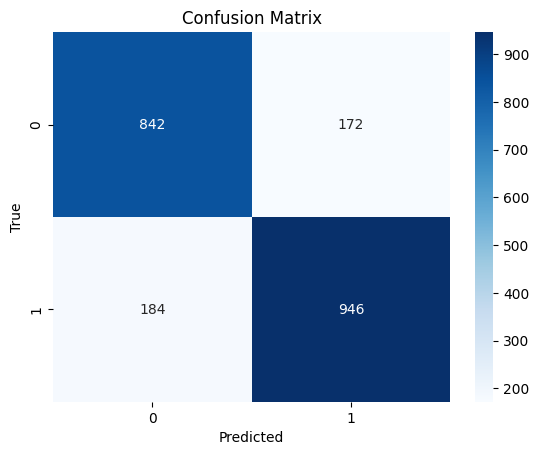

In [ ]:
cm = confusion_matrix(y_test, y_pred_forest)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## XGBoost

In [ ]:
gb = GradientBoostingClassifier()
gb.fit(X_train_scaled, y_train)

GradientBoostingClassifier()

In [ ]:
gb.score(X_test_scaled, y_test)

0.8097014925373134

In [ ]:
y_pred_boost = gb.predict(X_test_scaled)
print(classification_report(y_test, y_pred_boost))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1014
           1       0.83      0.81      0.82      1130

    accuracy                           0.81      2144
   macro avg       0.81      0.81      0.81      2144
weighted avg       0.81      0.81      0.81      2144



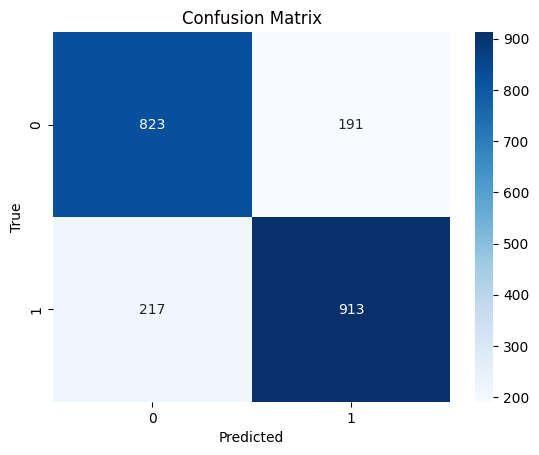

In [ ]:
cm = confusion_matrix(y_test, y_pred_boost)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
data['arr_delay_category'].value_counts().unique()

array([5789, 4929])

## ANN

In [ ]:
from sklearn.neural_network import MLPClassifier

ann = MLPClassifier(hidden_layer_sizes=(30, 40 ,50), max_iter=1000, alpha=0.0001, solver="adam", verbose=False, random_state=42)

In [ ]:
ann.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(30, 40, 50), max_iter=1000, random_state=42)

In [ ]:
ann.score(X_test_scaled, y_test)

0.7574626865671642

## ROC and AUC

In [ ]:
from sklearn.metrics import roc_curve, auc

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_log)
auc_logistic = auc(logistic_fpr, logistic_tpr)

svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)

tree_fpr, tree_tpr, threshold = roc_curve(y_test, y_pred_tree)
auc_tree = auc(tree_fpr, tree_tpr)

forest_fpr, forest_tpr, threshold = roc_curve(y_test, y_pred_forest)
auc_forest = auc(forest_fpr, forest_tpr)

plt.figure(figsize=(6,6), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='solid', label='SVM (auc = %0.3f)' % auc_svm)
plt.plot(logistic_fpr, logistic_tpr, linestyle='dashed', label='Logistic (auc = %0.3f)' % auc_logistic)
plt.plot(tree_fpr, tree_tpr, linestyle='dashdot', label='Decision Tree (auc = %0.3f)' % auc_tree)
plt.plot(forest_fpr, forest_tpr, linestyle='dotted', label='Random Forest (auc = %0.3f)' % auc_forest)
plt.plot([0,1], [0,1], color='black', linestyle='solid')

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend(prop={"size":10}, loc="lower right")

plt.show()

## Regression

In [ ]:
# Classifiers from scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Performance metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [ ]:
reglabels = data['Arrival Delay']

In [ ]:
print(f"\nDataset shape: {data.shape}")
features_train, features_test, labels_train, labels_test = train_test_split(features, reglabels, test_size=0.20, random_state=42)
print(f"features_train shape: {features_train.shape} | features_test shape: {features_test.shape}")
print(f"labels_train shape: {labels_train.shape} | labels_test shape: {labels_test.shape}")


Dataset shape: (10718, 27)
features_train shape: (8574, 22) | features_test shape: (2144, 22)
labels_train shape: (8574,) | labels_test shape: (2144,)


In [ ]:
reglabels

0          1
1         -5
2        -13
3        -13
4          4
        ... 
10713      6
10714      5
10715     11
10716    147
10717      5
Name: Arrival Delay, Length: 10718, dtype: int64

In [ ]:
perf_df = pd.DataFrame(columns=["Regressors", "MSE", "RMSE", "MAE", "R2"])
def print_metrics(labels_test, model_pred, regressor_name, perf_df):
    
    mse = mean_squared_error(labels_test, model_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(labels_test, model_pred)
    r2 = r2_score(labels_test, model_pred)
    
    print(f"MSE      : {mse}", end="\n\n")
    print(f"RMSE     : {rmse}", end="\n\n")
    print(f"MAE      : {mae}", end="\n\n")
    print(f"R2 Score : {r2}", end="\n\n")
    
    perf_df = perf_df.append({"Regressors": regressor_name,
                                        "MSE": mse, 
                                        "RMSE": rmse,
                                        "MAE": mae,
                                        "R2": r2}, ignore_index=True)
    return perf_df

## Linear Regression

In [ ]:
linearRegr = LinearRegression()
linearRegr.fit(features_train, labels_train)

LinearRegression()

In [ ]:
linearRegr.score(features_test, labels_test)

0.8418697177901076

In [ ]:
y_pred = linearRegr.predict(features_test)
perf_df = print_metrics(labels_test, y_pred, "LinearRegression", perf_df)

MSE      : 2135.5693837084063

RMSE     : 46.21222115099432

MAE      : 13.330370558606768

R2 Score : 0.8418697177901076



<ipython-input-58-bddba039b782>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  perf_df = perf_df.append({"Regressors": regressor_name,


## Decision Tree

In [ ]:
decRegr = DecisionTreeRegressor()
decRegr.fit(features_train, labels_train)

DecisionTreeRegressor()

In [ ]:
decRegr.score(features_test, labels_test)

0.8031454689895507

In [ ]:
y_pred = decRegr.predict(features_test)
perf_df = print_metrics(labels_test, y_pred, "DecisionRegression", perf_df)

MSE      : 2658.5452425373132

RMSE     : 51.56108263542682

MAE      : 15.193563432835822

R2 Score : 0.8031454689895507



<ipython-input-58-bddba039b782>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  perf_df = perf_df.append({"Regressors": regressor_name,


## Random Forest

In [ ]:
rfRegr = RandomForestRegressor()
rfRegr.fit(features_train, labels_train)

RandomForestRegressor()

In [ ]:
rfRegr.score(features_test, labels_test)

0.8918028569054879

In [ ]:
y_pred = rfRegr.predict(features_test)
perf_df = print_metrics(labels_test, y_pred, "Random Forest Regression", perf_df)

MSE      : 1461.2160489959747

RMSE     : 38.22585576538444

MAE      : 11.507815642768302

R2 Score : 0.8918028569054879



<ipython-input-58-bddba039b782>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  perf_df = perf_df.append({"Regressors": regressor_name,


## XGBoost Regression

In [ ]:
xgRegr = GradientBoostingRegressor()
xgRegr.fit(features_train, labels_train)

GradientBoostingRegressor()

In [ ]:
y_pred = xgRegr.predict(features_test)
perf_df = print_metrics(labels_test, y_pred, "GradientBoostingRegressor", perf_df)

MSE      : 1518.6547164758701

RMSE     : 38.96992066294041

MAE      : 12.39357944743555

R2 Score : 0.8875497557102535



<ipython-input-58-bddba039b782>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  perf_df = perf_df.append({"Regressors": regressor_name,


In [ ]:
perf_df.set_index("Regressors", inplace=True)
perf_df

,MSE,RMSE,MAE,R2
Regressors,,,,
LinearRegression,2135.569384,46.212221,13.330371,0.841870
DecisionRegression,2658.545243,51.561083,15.193563,0.803145
Random Forest Regression,1461.216049,38.225856,11.507816,0.891803
GradientBoostingRegressor,1518.654716,38.969921,12.393579,0.887550
